## Machine Learning Part 1

### Contents
#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### 4. Bonus: performance improvement after removing outliers¶
#### 5. Conclusions

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Turning project folder path into a string
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 6'

In [4]:
# Importing the already cleaned excel file from Task-6.2
df_linreg = pd.read_excel(os.path.join(path,'df_eco_profile_new.xlsx'))

In [5]:
df_linreg.head()

,Unnamed: 0,GeoFIPS,Average earnings per job (dollars),Earnings by place of work,Net earnings by place of residence,Per capita income maintenance benefits,Per capita personal income,Per capita unemployment insurance compensation,Population (persons),Total employment (number of jobs)
0,0,1001,39984,739418,1555278,919,43917,33,55869,18493
1,1,1003,38997,4661559,6178844,693,47485,29,223234,119535
2,2,1005,40885,477699,435544,1767,35763,33,24686,11684
3,3,1007,43208,298005,410984,1089,31725,30,22394,6897
4,4,1009,35325,564947,1299138,835,36412,31,57826,15993


In [6]:
df_linreg.columns

Index(['Unnamed: 0', 'GeoFIPS', 'Average earnings per job (dollars)',
       'Earnings by place of work', 'Net earnings by place of residence',
       'Per capita income maintenance benefits', 'Per capita personal income',
       'Per capita unemployment insurance compensation',
       'Population (persons)', 'Total employment (number of jobs)'],
      dtype='object')

### 2. Data preparation for regression analysis 

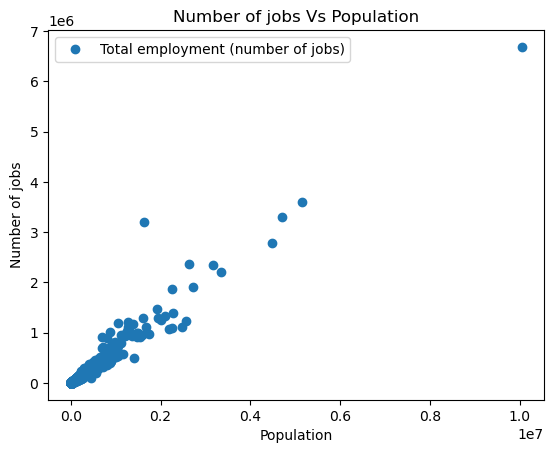

In [7]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_linreg.plot(x = 'Population (persons)', y='Total employment (number of jobs)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of jobs Vs Population')  
plt.xlabel('Population')  
plt.ylabel('Number of jobs')  
plt.show()

## Hypothesis 
### If the Population of a county is high then the employment generated will be higher.¶

In [8]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df_linreg['Population (persons)'].values.reshape(-1,1)
y = df_linreg['Total employment (number of jobs)'].values.reshape(-1,1)

In [9]:
X

array([[ 55869],
       [223234],
       [ 24686],
       ...,
       [ 20226],
       [  7805],
       [  6927]])

In [10]:
y

array([[ 18493],
       [119535],
       [ 11684],
       ...,
       [ 11961],
       [  5199],
       [  3976]])

In [11]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [12]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

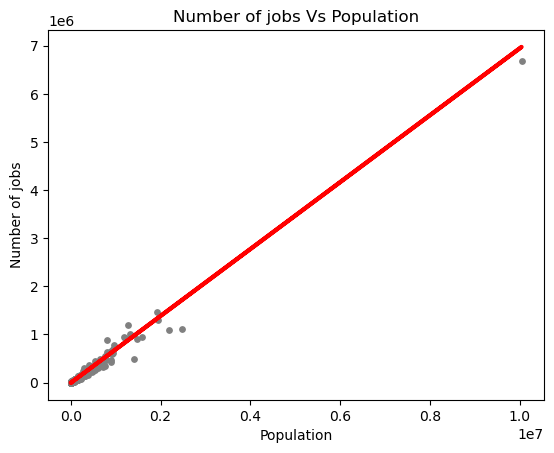

In [15]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of jobs Vs Population')
plot_test.xlabel('Population')
plot_test.ylabel('Number of jobs')
plot_test.show()

### Interpretation of how well the line appears to fit the data in a markdown cell: 
    Although the regression line looks to be overlapping but still it does not appear to be a very good fit. 

In [16]:
# Checking the model performance statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Printing the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6954796]]
Mean squared error:  1697447467.0247924
R2 score:  0.9749381191513024


In [18]:
y_predicted

array([[ 5.73397249e+03],
       [ 8.73349639e+05],
       [ 2.62527071e+04],
       [ 2.06784381e+04],
       [ 6.45152126e+04],
       [ 8.17937302e+05],
       [-4.74760053e+03],
       [ 6.93884382e+04],
       [ 4.46122782e+05],
       [ 2.95638854e+04],
       [ 2.93385500e+04],
       [-4.86374562e+03],
       [-5.39948964e+02],
       [ 5.67254556e+02],
       [ 6.51916895e+03],
       [ 4.47515442e+03],
       [ 2.30256817e+04],
       [ 4.16010216e+03],
       [ 5.72850067e+04],
       [ 8.20640246e+03],
       [ 5.89509903e+02],
       [ 7.44693874e+03],
       [ 5.80838881e+03],
       [ 2.18461483e+04],
       [ 2.38804262e+04],
       [ 6.47036876e+04],
       [ 1.27942566e+03],
       [ 4.29549595e+02],
       [ 9.05558305e+03],
       [ 2.46990056e+04],
       [ 5.32901719e+04],
       [ 5.26800116e+03],
       [ 2.71797814e+04],
       [ 3.74606707e+02],
       [ 2.80588901e+05],
       [ 3.22901655e+04],
       [ 8.56666089e+03],
       [ 8.02766420e+03],
       [ 3.9

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7049,5733.972489
1,1204282,873349.639224
2,20475,26252.707065
3,21921,20678.438088
4,45792,64515.212623
5,949771,817937.302261
6,3061,-4747.600531
7,57058,69388.438166
8,488527,446122.781551
9,32712,29563.885431


##### Compare how the regression fits the training set

In [20]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6954796]]
Mean squared error:  3380349000.854808
R2 score:  0.9297296802644359


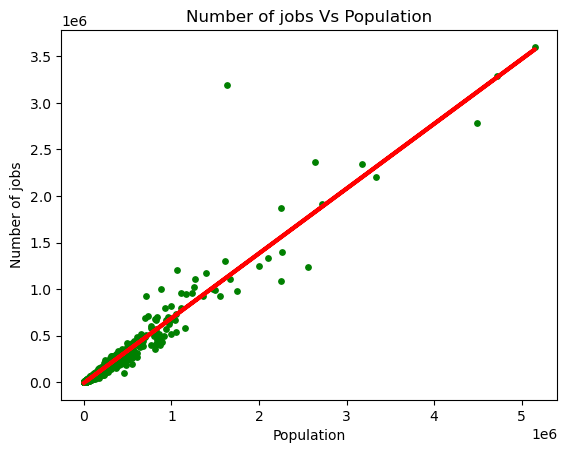

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of jobs Vs Population')
plot_test.xlabel('Population')
plot_test.ylabel('Number of jobs')
plot_test.show()

### Include your thoughts on how well the model performed on the test set in a markdown cell.
 - The value of Mean squared error:  1697447467.0247924
 - The value of R2 score:  0.9749381191513024
 - The value of R2 score is almost '1' which indicates that the model is a good fit. 
 - However the Mean Squared Error also has an extremely high value which indicates a very large variance. 
 - My guess is that this is due to the large number of data points and as a result a large number of outliers.

### 4. Bonus: performance improvement after removing outliers using box plot strategy.

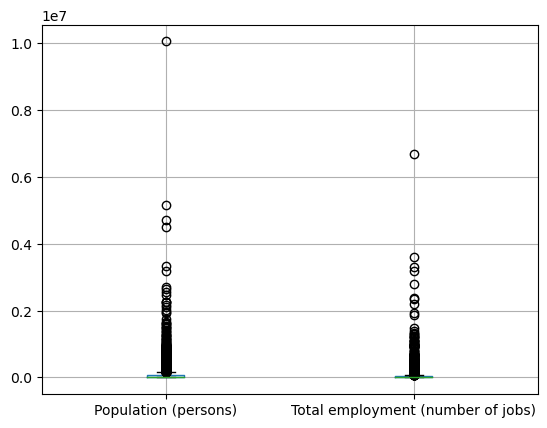

In [24]:
### Bonus: performance improvement after removing outliers# Box plot for each column in the DataFrame
sub = df_linreg[['Population (persons)', 'Total employment (number of jobs)']]

sub.boxplot()
plt.show()

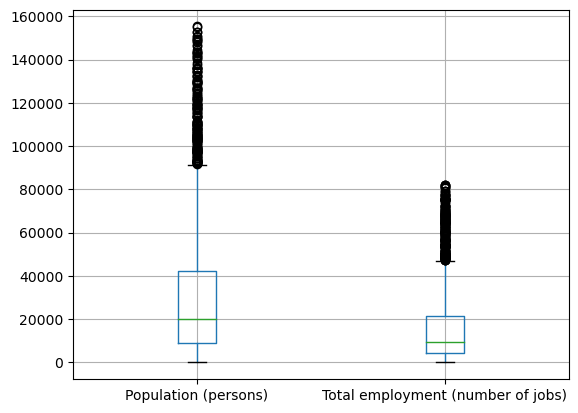

In [25]:

Q1 = sub.quantile(0.25)
Q3 = sub.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5  # Adjust the threshold based on your needs

# Find and remove outliers
df_no_outliers = sub[~((sub < (Q1 - threshold * IQR)) | (sub > (Q3 + threshold * IQR))).any(axis=1)]

# remove outliers 
df_no_outliers.boxplot()
plt.show()

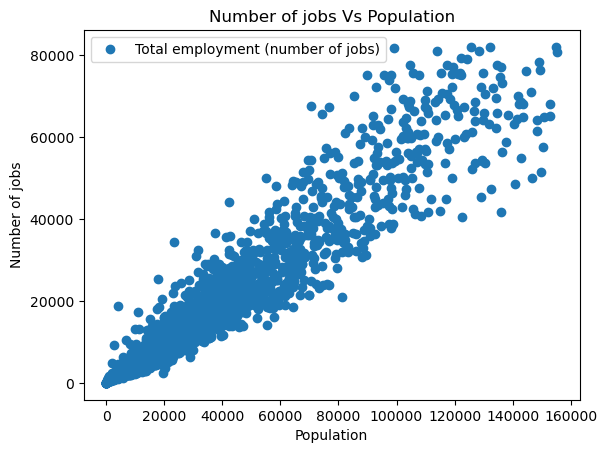

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_no_outliers.plot(x = 'Population (persons)', y='Total employment (number of jobs)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of jobs Vs Population')  
plt.xlabel('Population')  
plt.ylabel('Number of jobs')  
plt.show()

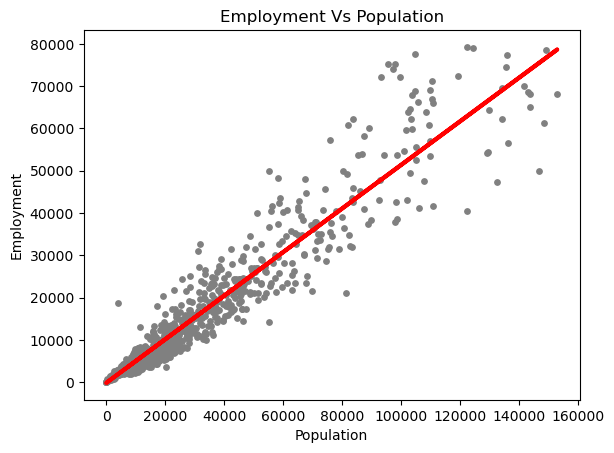

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_no_outliers['Population (persons)'].values.reshape(-1,1)
y = df_no_outliers['Total employment (number of jobs)'].values.reshape(-1,1)

# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

# Predict the values of y using X.

y_predicted = regression.predict(X_test)



# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Employment Vs Population')
plot_test.xlabel('Population')
plot_test.ylabel('Employment')
plot_test.show()

In [ ]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Per capita income Vs Population')
plot_test.xlabel('Population')
plot_test.ylabel('Per capita income')
plot_test.show()

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51555614]]
Mean squared error:  28269372.24145283
R2 score:  0.9028596070972096


### 5. Conclusions

#### With outliers regression performance 
Mean squared error:  1697447467.0247924
R2 score:  0.9749381191513024
#### Without outliers regression performance 
Mean squared error:  28269372.24145283
R2 score:  0.9028596070972096
#### Inferences
1. Without oultiers the Mean Squared Error has reduced by 1/50th times.
2. However the R2 score has also reduced albeit slightly from 0.97 to 0.90.
3. As such I would conclude that the model is performing better without outliers.
#### Impact of possible data biases on the overall appropriatness of regression for this relationship 
- The values of Mean Squared Error and R2 score are quite contradictory. 
- As a data analyst I feel that the regression model is probably not the best to find the relationship between Total employment (number of jobs) and Population (persons). 
- Total employment is a very complex concept which will depend on many factors besides just Population. 
- This is why a simple regression relationship between Total employment and Population is not the best.
